## Face Detection

In [39]:
import cv2

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
nadia = cv2.imread('C:/Data Science/Nadia.jpg',0)
denis = cv2.imread('C:/Data Science/Denis.jpg',0)
solvay = cv2.imread('C:/Data Science/solvay.jpg',0)

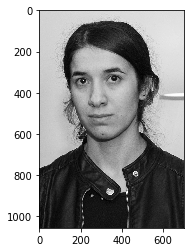

In [42]:
plt.imshow(nadia, cmap='gray')

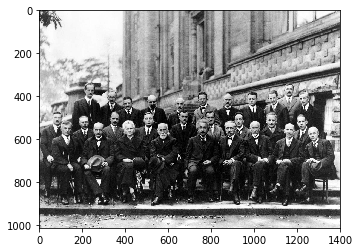

In [43]:
plt.imshow(solvay, cmap='gray')

In [44]:
face_cascade = cv2.CascadeClassifier('C:/Data Science/haarcascade_frontalface_default.xml')

In [45]:
def detect_face(img):
    
    face_img = img.copy()
    
    face_rects = face_cascade.detectMultiScale(face_img)
    
    for (x,y,w,h) in face_rects:
        cv2.rectangle(face_img,(x,y),(x+w,y+h),(255,255,255),10)
        
    return face_img

In [46]:
result = detect_face(denis)

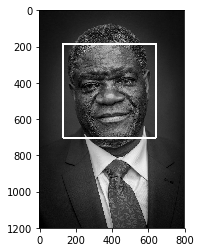

In [47]:
plt.imshow(result, cmap='gray')

In [48]:
result = detect_face(nadia)

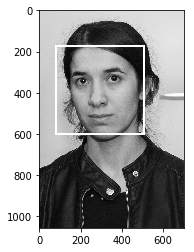

In [49]:
plt.imshow(result, cmap='gray')

In [51]:
def adj_detect_face(img):
    
    face_img = img.copy()
    
    face_rects = face_cascade.detectMultiScale(face_img, scaleFactor=1.2, minNeighbors = 5)
    
    for (x,y,w,h) in face_rects:
        cv2.rectangle(face_img,(x,y),(x+w,y+h),(255,255,255),10)
        
    return face_img

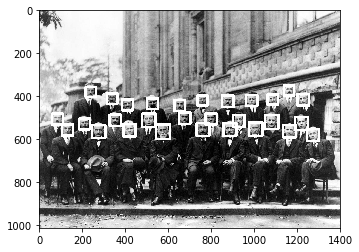

In [52]:
result = adj_detect_face(solvay)
plt.imshow(result, cmap='gray')

In [53]:
eye_cascade = cv2.CascadeClassifier('C:/Data Science/haarcascade_eye.xml')

In [58]:
def detect_eyes(img):
    
    face_img = img.copy()
    
    eyes_rects = eye_cascade.detectMultiScale(face_img, scaleFactor=1.3, minNeighbors = 5)
    
    for (x,y,w,h) in eyes_rects:
        cv2.rectangle(face_img,(x,y),(x+w,y+h),(255,255,255),10)
        
    return face_img

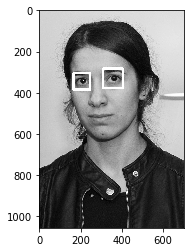

In [59]:
result = detect_eyes(nadia)
plt.imshow(result, cmap='gray')

In [62]:
cap = cv2.VideoCapture(0)

while True:
    
    ret,frame = cap.read(0)
    
    frame = detect_face(frame)
    
    cv2.imshow('Video Face Detect', frame)
    
    k = cv2.waitKey(1)
    
    if k == 27:
        break
        
cap.release()
cv2.destroyAllWindows()